In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import *
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_absolute_error,accuracy_score,classification_report
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
wdf = pd.read_csv(r"Walmart.csv",parse_dates=True)

In [3]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
wdf['Date'] = wdf['Date'].apply(lambda x: pd.to_datetime(x))

In [5]:
wdf.index = wdf['Date']

In [6]:
wdf.drop(['Date'],axis=1,inplace=True)

In [7]:
wdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [8]:
wdf.shape

(6435, 7)

In [9]:
cols = wdf.columns
cols

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [10]:
wdf.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106


In [11]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [12]:
wdf.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [13]:
wdf.duplicated().sum()

0

In [14]:
wdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [15]:
wdf.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


## each feature vs weekly sales

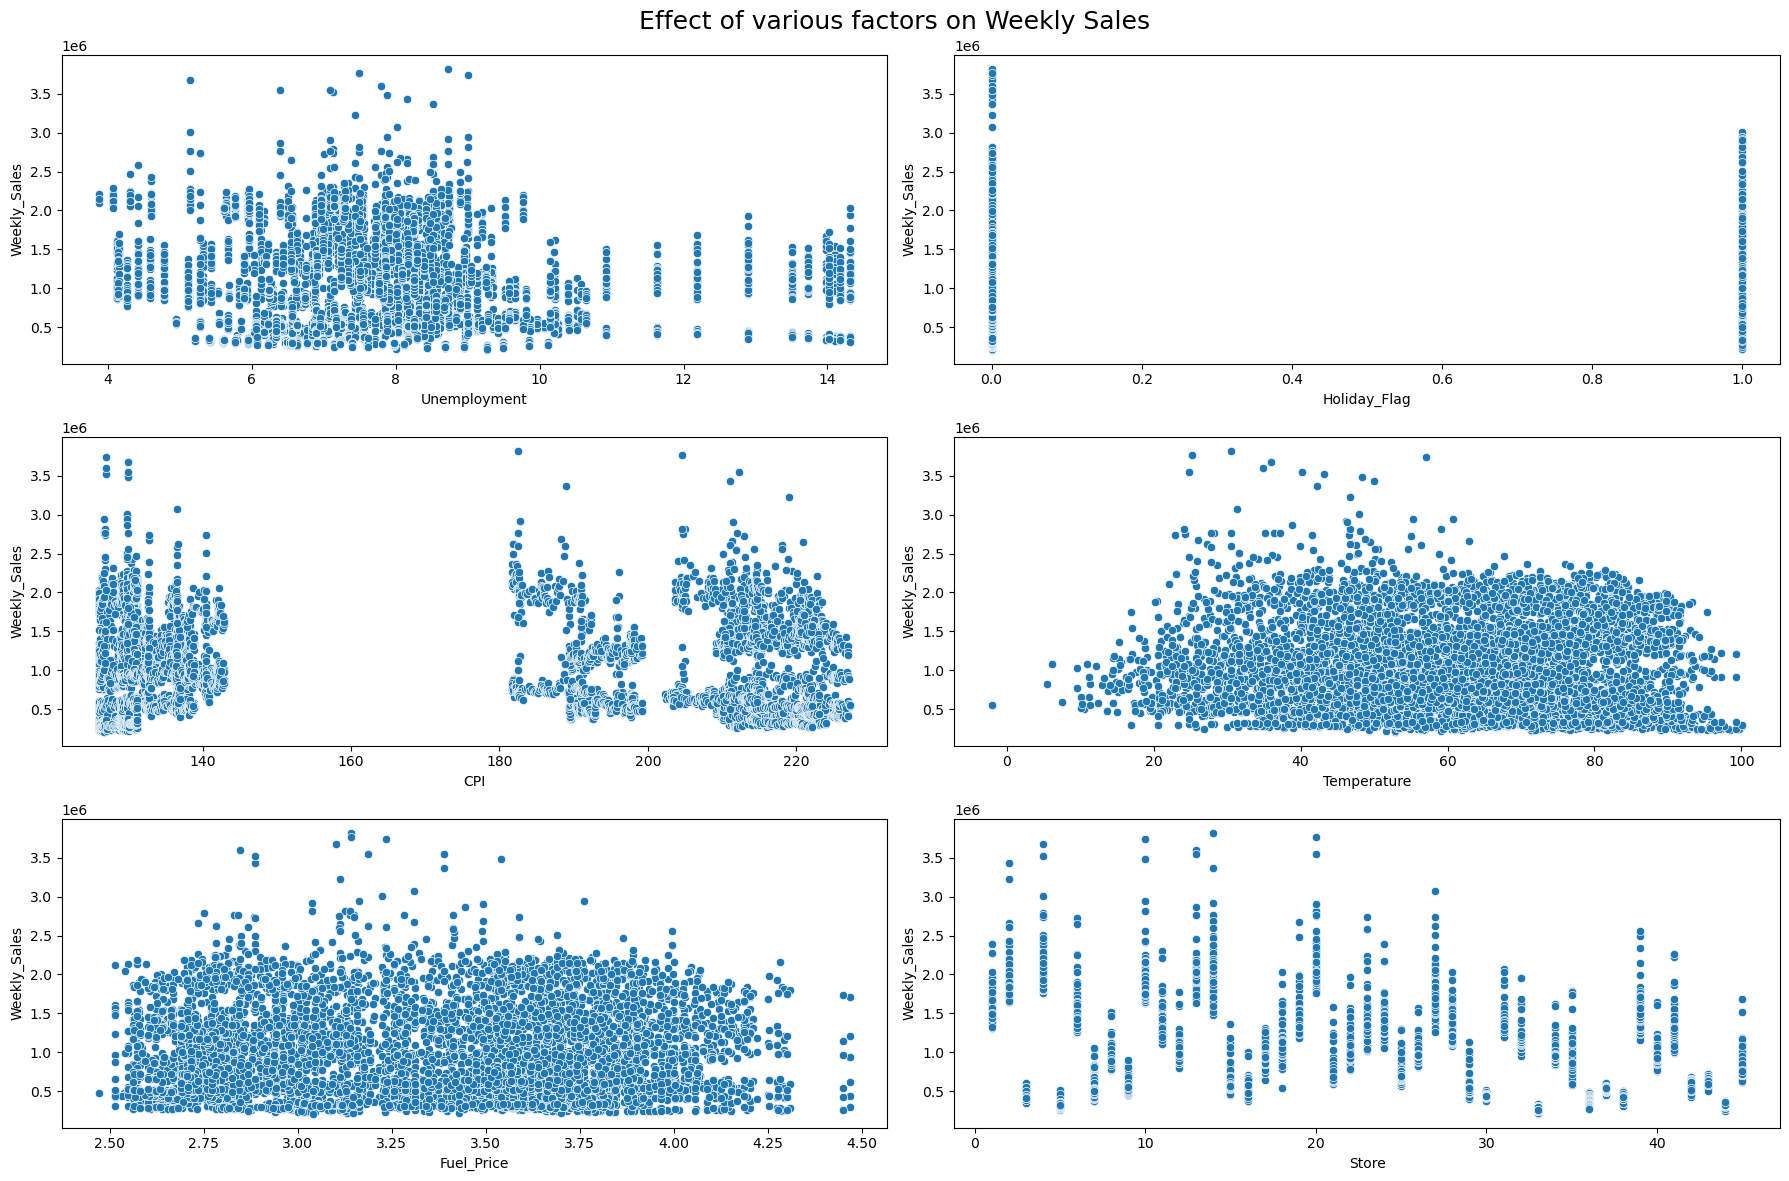

In [16]:
fig, axes = plt.subplots(3,2,figsize=(18,12))
ax_index = [(i,j) for i in range(3) for j in range(2)]
index_number = 0
fig.suptitle('Effect of various factors on Weekly Sales',fontsize=18, color = 'Black')
for i in ['Unemployment','Holiday_Flag','CPI','Temperature','Fuel_Price','Store']:
    sns.scatterplot(x=i, y='Weekly_Sales', data=wdf, ax=axes[ax_index[index_number]], palette='afmhot_r')
    index_number += 1
    plt.tight_layout()

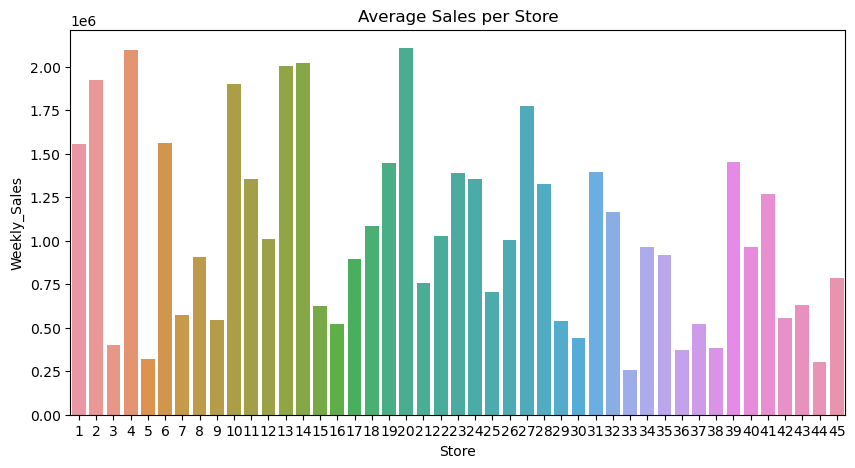

In [17]:
avg_sales_per_store = wdf.groupby(by='Store')['Weekly_Sales'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x = avg_sales_per_store.index, y=avg_sales_per_store)
plt.title('Average Sales per Store')
plt.show()

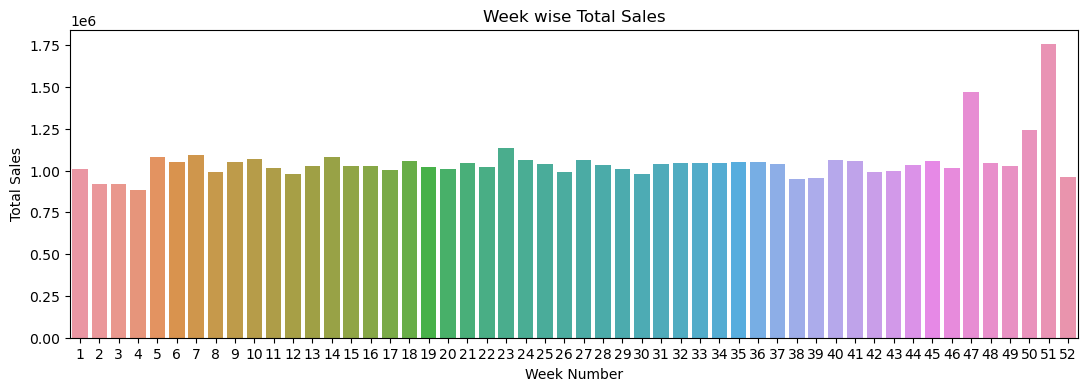

In [18]:
plt.figure(figsize=(13, 4))  # Adjust the figsize as per your preference
sns.barplot(x=wdf.index.isocalendar().week, y="Weekly_Sales", data=wdf, ci=None)
plt.title('Week wise Total Sales')
plt.xlabel('Week Number')
plt.ylabel('Total Sales')
plt.show()

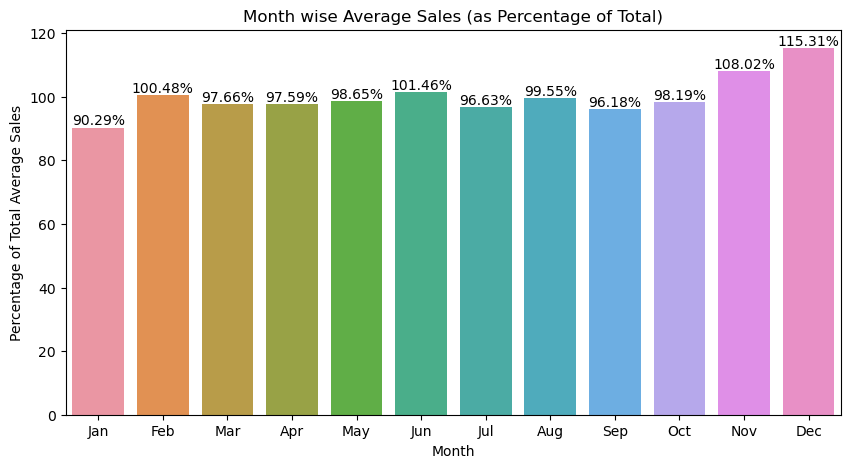

In [19]:
month_wise_avg_sales = wdf.groupby(wdf.index.month)['Weekly_Sales'].mean()

# Calculate total average sales
total_avg_sales = month_wise_avg_sales.mean()

# Calculate percentages
percentages = (month_wise_avg_sales / total_avg_sales) * 100

plt.figure(figsize=(10, 5))
plt.title('Month wise Average Sales (as Percentage of Total)')
g = sns.barplot(x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], y=percentages)

for p in g.patches:
    g.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='bottom', color='black')

plt.ylabel('Percentage of Total Average Sales')
plt.xlabel('Month')
plt.show()

In [20]:
wdf['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# extract the unemployment rate and weekly sales columns
X = wdf.loc[:,['Unemployment']]
y = wdf.loc[:,['Weekly_Sales']]
print(X.shape)
print(y.shape)

(6435, 1)
(6435, 1)


In [23]:
# create a Linear Regression model
model = LinearRegression()

In [24]:
# fit the model to the data
model.fit(X, y)

# make predictions using the model
predictions = model.predict(X)

In [25]:
# calculate the correlation between unemployment rate and weekly sales
correlation = np.corrcoef(wdf['Unemployment'], wdf['Weekly_Sales'])[0][1]

# print the correlation
print("Correlation between unemployment rate and weekly sales:", correlation)

Correlation between unemployment rate and weekly sales: -0.10617608965795416


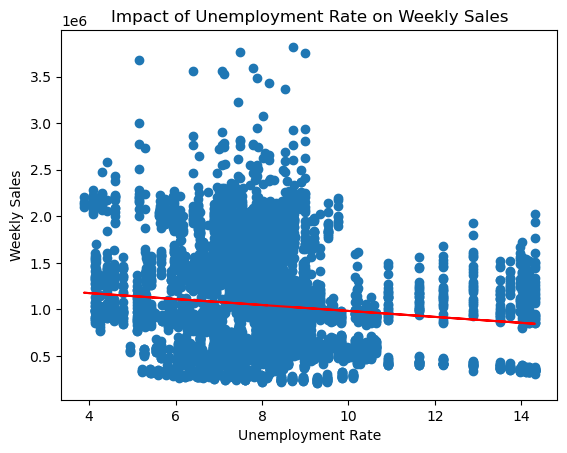

In [26]:
# plot the actual vs predicted values
plt.scatter(wdf['Unemployment'], wdf['Weekly_Sales'])
plt.plot(wdf['Unemployment'], predictions, color='red')
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.title("Impact of Unemployment Rate on Weekly Sales")
plt.show()

#### the regression line slopes downwards, it means that there is a negative relationship between Unemployment Rate and weeklysales 

In [27]:
# calculate the store-wise correlation between unemployment rate and weekly sales
store_wise_correlation = {}
for store in wdf['Store'].unique():
    store_data = wdf[wdf['Store'] == store]
    correlation = np.corrcoef(store_data['Unemployment'], store_data['Weekly_Sales'])[0][1]
    store_wise_correlation[store] = correlation
store_wise_correlation_df = pd.DataFrame(list(store_wise_correlation.items()), columns=['Store', 'Correlation'])
store_wise_correlation_df = store_wise_correlation_df.sort_values(by='Correlation', ascending=False)
store_wise_correlation_df.head()

,Store,Correlation
35,36,0.833734
34,35,0.483865
20,21,0.218367
13,14,0.210786
29,30,0.201862


In [28]:
# determine the store that is most affected by unemployment rate
max_correlation = max(store_wise_correlation.values())
for store, corr in store_wise_correlation.items():
    if corr == max_correlation:
        most_affected_store = store
        break

print("Store most affected by unemployment rate:", most_affected_store)

Store most affected by unemployment rate: 36


In [29]:
T = wdf.loc[:, ['Temperature']]
W = wdf.loc[:, ['Weekly_Sales']]

In [30]:
reg1 = LinearRegression().fit(T, W)

In [31]:
y_pred = reg1.predict(T)
y_pred =y_pred.flatten()

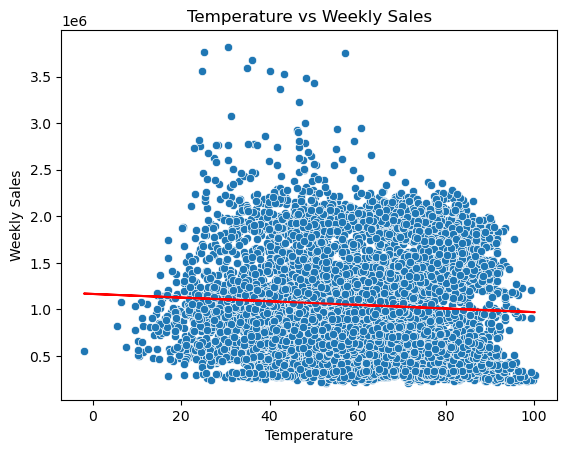

In [32]:
# plot the scatter plot of the temperature vs weekly sales
sns.scatterplot(x=wdf['Temperature'], y=wdf['Weekly_Sales'])
# plot the regression line
plt.plot(wdf['Temperature'], y_pred, color='red')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs Weekly Sales')
plt.show()

#### the regression line slopes downwards, it means that there is a slight negative relationship between temperature and weekly sales, i.e., higher temperature results in lower sales.

In [33]:
C = wdf.loc[:, ['CPI']]
W = wdf.loc[:, ['Weekly_Sales']]

In [34]:
reg = LinearRegression().fit(C, W)
# predict the weekly sales using the Consumer Price Index data
C_pred = reg.predict(C)
C_pred = C_pred.flatten()

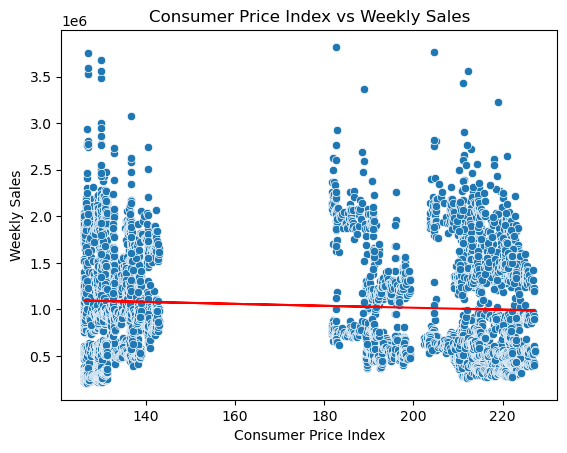

In [35]:
sns.scatterplot(x=wdf['CPI'], y=wdf['Weekly_Sales'])

# Plot the regression line
plt.plot(wdf['CPI'], C_pred, color='red')

# Labeling and title
plt.xlabel('Consumer Price Index')
plt.ylabel('Weekly Sales')
plt.title('Consumer Price Index vs Weekly Sales')

# Show plot
plt.show()

#### From the scatter plot and the regression line, you can determine that regression line is slightly slope downward which means there is a slightly negative relation ship

In [36]:
# group the data by store and calculate the average sales for each store
store_wise_avg_sales = wdf.groupby('Store').mean()['Weekly_Sales']

In [37]:
# sort the store_wise_avg_sales dataframe in descending order
store_wise_avg_sales = store_wise_avg_sales.sort_values(ascending=False)

In [38]:
# print the top-performing store
print("Top-performing store: ", store_wise_avg_sales.index[0])
print("Average Sales: ", store_wise_avg_sales.values[0])

Top-performing store:  20
Average Sales:  2107676.8703496503


In [39]:
# print the worst-performing store
print("Worst-performing store: ", store_wise_avg_sales.index[-1])
print("Average Sales: ", store_wise_avg_sales.values[-1])

Worst-performing store:  33
Average Sales:  259861.69202797202


In [40]:
# print the difference between the highest and lowest performing stores
difference = store_wise_avg_sales.values[0] - store_wise_avg_sales.values[-1]
print("Difference between highest and lowest performing stores: ", difference)

Difference between highest and lowest performing stores:  1847815.1783216782


In [41]:
wdf.index

DatetimeIndex(['2010-05-02', '2010-12-02', '2010-02-19', '2010-02-26',
               '2010-05-03', '2010-12-03', '2010-03-19', '2010-03-26',
               '2010-02-04', '2010-09-04',
               ...
               '2012-08-24', '2012-08-31', '2012-07-09', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-05-10', '2012-12-10',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

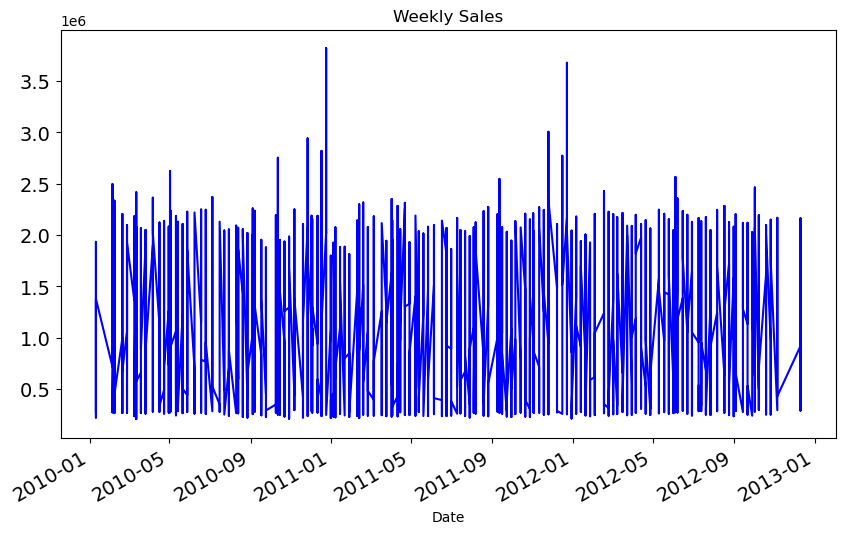

In [42]:
wdf['Weekly_Sales'].plot(figsize=(10,6), title= 'Weekly Sales', fontsize=14, color = 'blue')
plt.show()

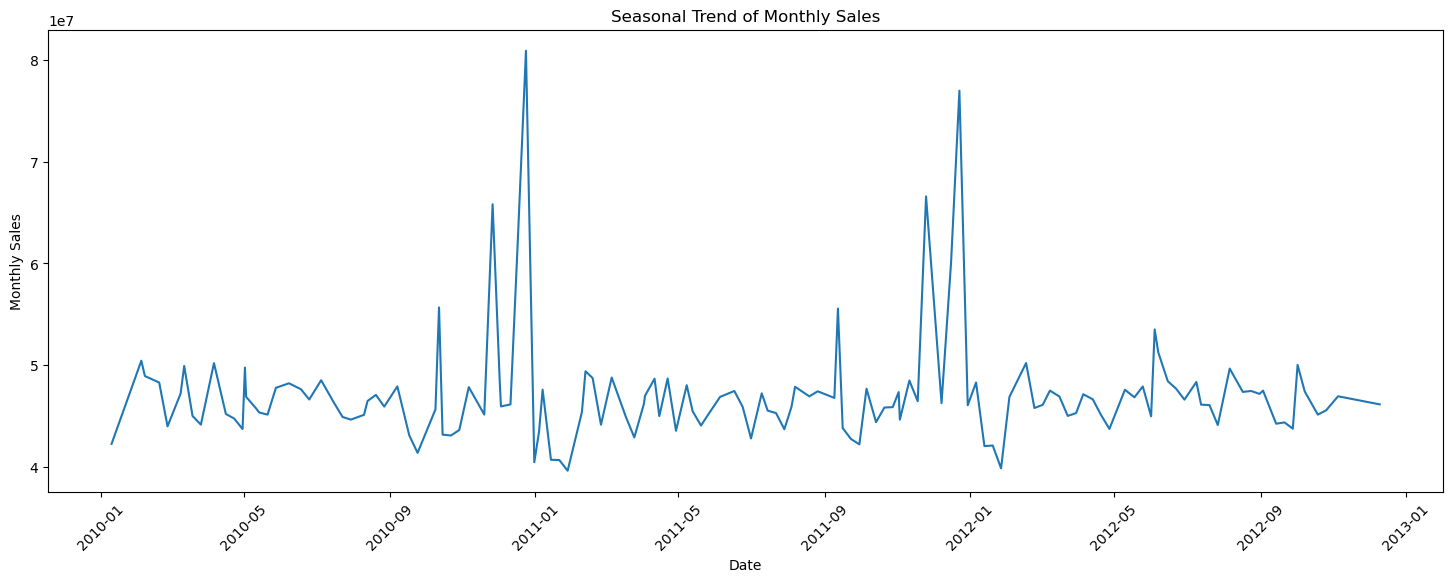

In [43]:
monthly_sales = wdf.groupby(wdf.index).sum()

plt.figure(figsize=(18,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales['Weekly_Sales'])
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Monthly Sales')
plt.title('Seasonal Trend of Monthly Sales')
plt.show()

In [44]:
def check_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

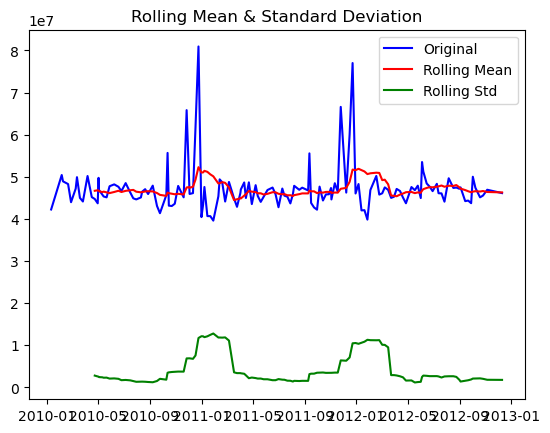

Results of Dickey-Fuller Test:
Test Statistic                -9.837722e+00
p-value                        4.845103e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


In [45]:
check_stationarity(monthly_sales['Weekly_Sales'])

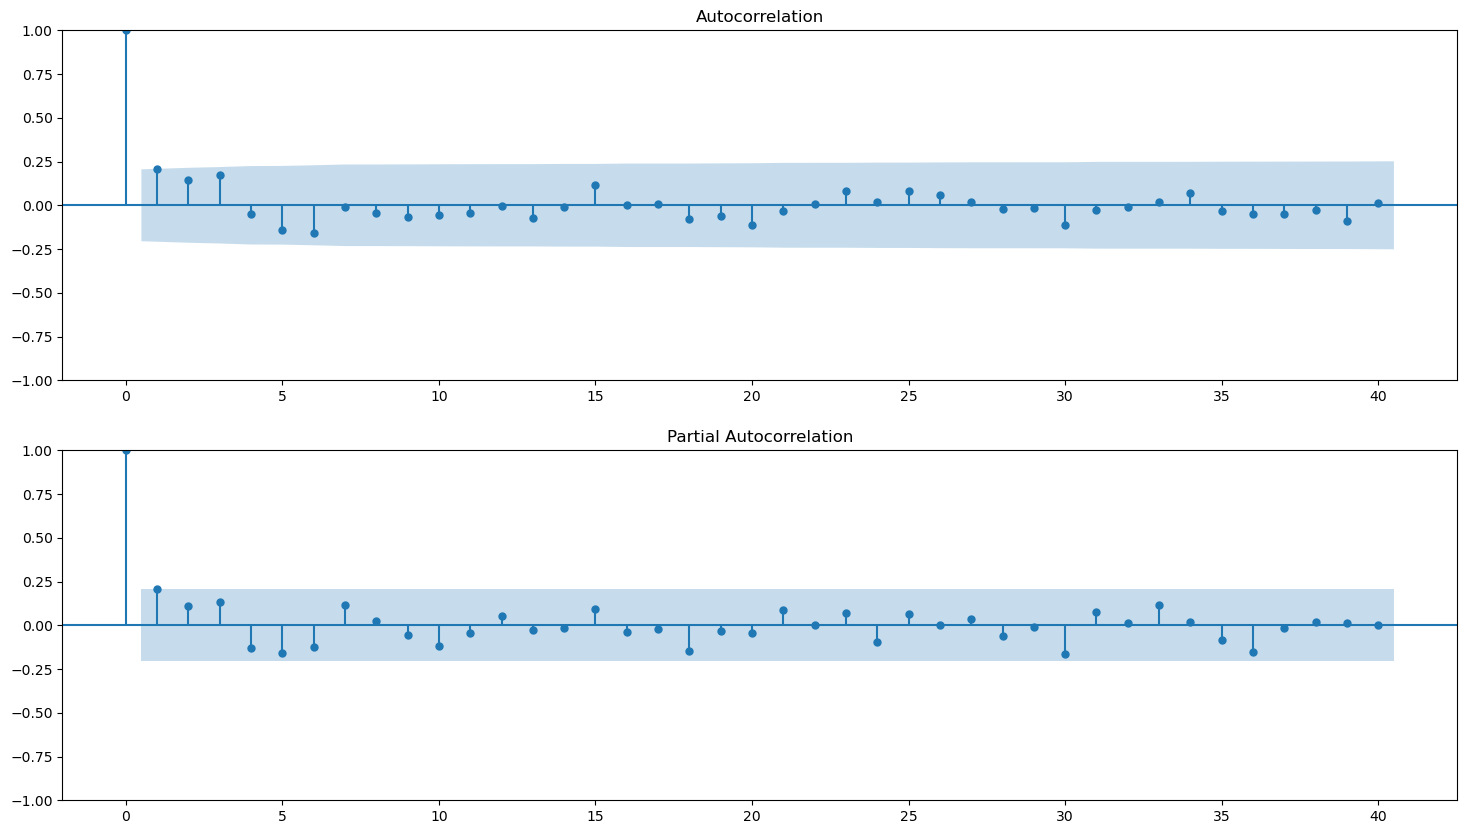

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(monthly_sales['Weekly_Sales'].iloc[52:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(monthly_sales['Weekly_Sales'].iloc[52:],lags=40,ax=ax2)

<Figure size 640x480 with 0 Axes>

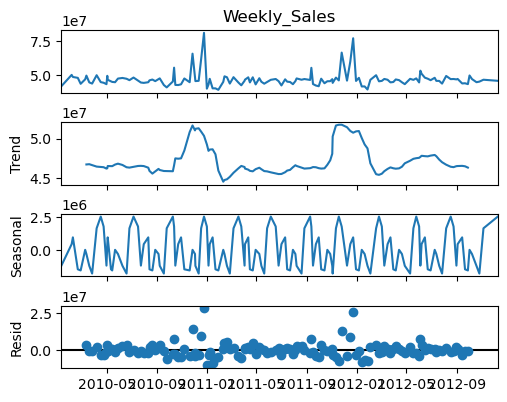

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_sales['Weekly_Sales'], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(5, 4)
plt.show()

In [48]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(monthly_sales['Weekly_Sales'], 
                          trace=True,
                          seasonal=False,
                          suppress_warnings=True,
                          m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5462.768, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4917.955, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5366.050, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4841.703, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4844.691, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4843.516, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4843.733, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4841.471, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4843.486, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4845.479, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total 

# ARIMA

In [49]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(monthly_sales['Weekly_Sales'],order=(0, 0, 1))
model_fit=model.fit()

In [50]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2417.698
Date:                Sun, 28 Apr 2024   AIC                           4841.397
Time:                        16:00:21   BIC                           4850.285
Sample:                             0   HQIC                          4845.008
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.711e+07   6.61e+05     71.232      0.000    4.58e+07    4.84e+07
ma.L1          0.1996      0.046      4.372      0.000       0.110       0.289
sigma2      2.886e+13      0.186   1.55e+14      0.000    2.89e+13    2.89e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1282.42
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             3.09
Prob(H) (two-sided):                  0.46   Kurtosis:                        16.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.3e+28. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

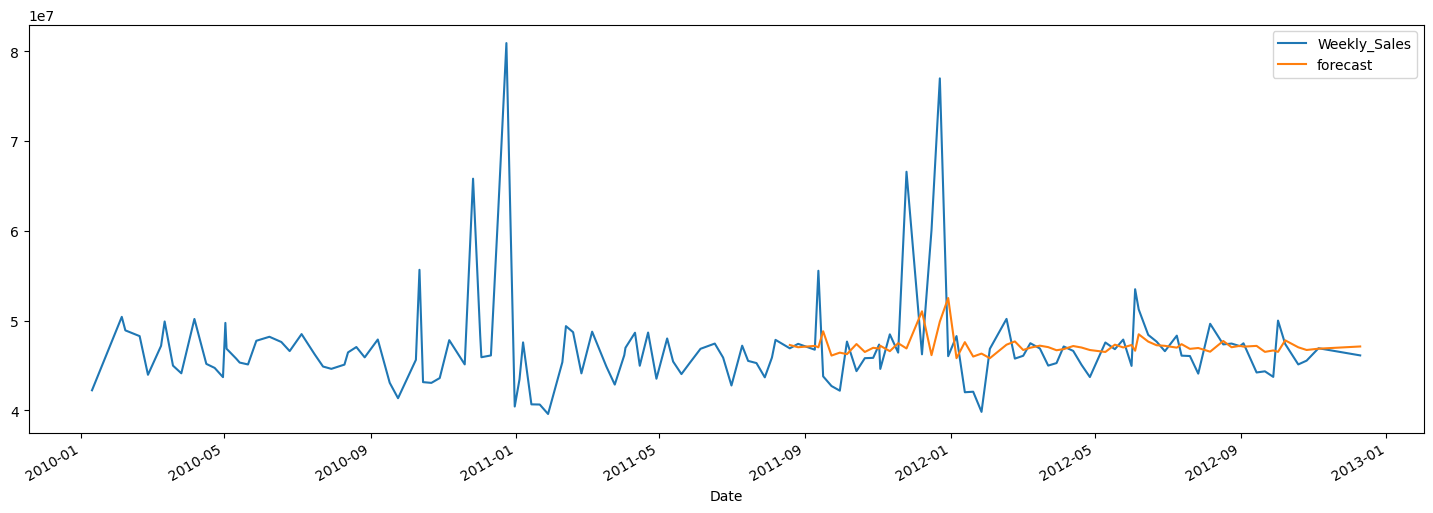

In [51]:
monthly_sales['forecast']=model_fit.predict(start=80,end=142)
monthly_sales[['Weekly_Sales','forecast']].plot(figsize=(18,6))

In [52]:
np.sqrt(mean_absolute_error(monthly_sales['Weekly_Sales'][80:142],monthly_sales['forecast'][80:142]))

1719.8566856222462

In [53]:
r2_score(monthly_sales['Weekly_Sales'][80:142],monthly_sales['forecast'][80:142])

0.03314167007046198

# SARIMAX

In [54]:
model1=SARIMAX(monthly_sales['Weekly_Sales'],order=(1,0,1),seasonal_order=(1,0,1,52))
results1=model1.fit()

In [55]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 52)   Log Likelihood               -2416.653
Date:                            Sun, 28 Apr 2024   AIC                           4843.307
Time:                                    16:00:23   BIC                           4858.121
Sample:                                         0   HQIC                          4849.326
                                            - 143                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   4.19e-05   2.39e+04      0.000       1.000       1.000
ma.L1         -0.9924      0.076    -13.020      0.000      -1.142      -0.843
ar.S.L52       0.5099      1.316      0.387      0.699      -2.070       3.090
ma.S.L52      -0.0176      1.750     -0.010      0.992      -3.447       3.412
sigma2      3.743e+13   5.52e-14   6.78e+26      0.000    3.74e+13    3.74e+13
===================================================================================
Ljung-Box (L1) (Q):                   3.64   Jarque-Bera (JB):              1320.12
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             2.96
Prob(H) (two-sided):                  0.08   Kurtosis:                        16.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.55e+43. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

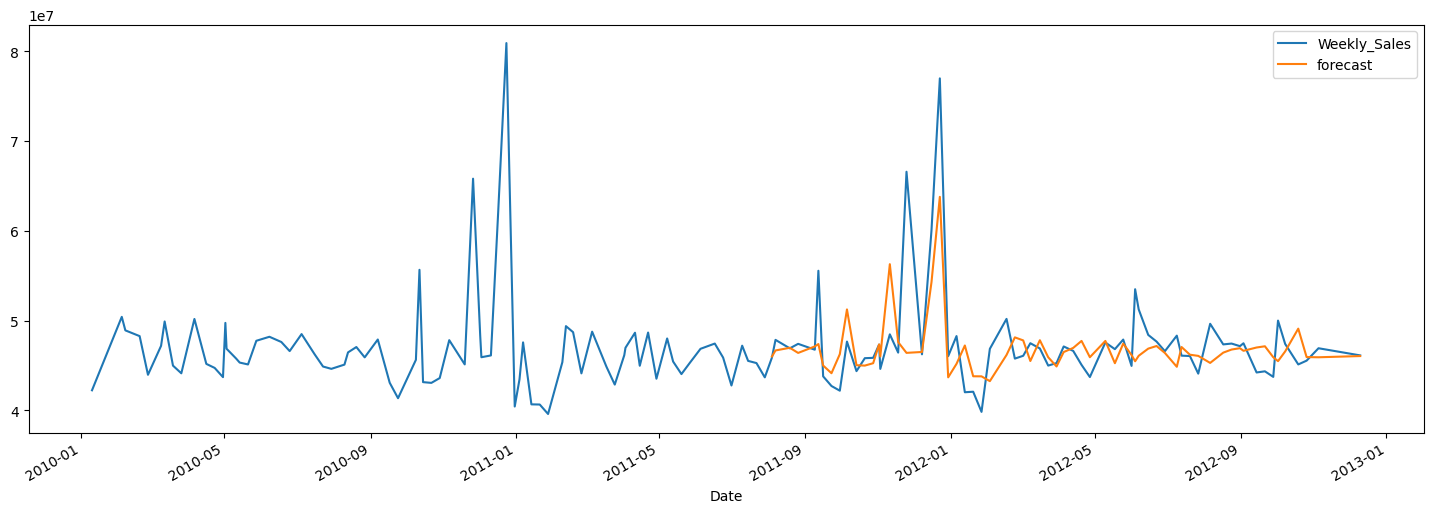

In [56]:
monthly_sales['forecast']=results1.predict(start=78,end=142,dynamic=True)
monthly_sales[['Weekly_Sales','forecast']].plot(figsize=(18,6))

In [57]:
np.sqrt(mean_absolute_error(monthly_sales['Weekly_Sales'][78:142],monthly_sales['forecast'][78:142]))

1591.3060534843548

In [58]:
r2_score(monthly_sales['Weekly_Sales'][78:142],monthly_sales['forecast'][78:142])

0.4086713955868917

In [59]:
wd = wdf
inp= wd.drop('Weekly_Sales',axis=1)
out = wd['Weekly_Sales']

# DecisionTreeRegressor

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.eval_measures import rmse

x_train,x_test,y_train,y_test = train_test_split(inp,out,test_size=0.2,random_state=42)

In [61]:
dtree=  DecisionTreeRegressor()
dtree.fit(x_train,y_train)
_
ytrain_pred = dtree.predict(x_train)
ytest_pred = dtree.predict(x_test)

print('RMSE score of DecisionTree for train data: ', rmse(y_train, ytrain_pred) )
print('R^2 score of Decision Tree for train data: ',r2_score(y_train, ytrain_pred) )

print('RMSE score of DecisionTree for test data: ', rmse(y_test, ytest_pred) )
print('R^2 score of Decision Tree for test data: ', r2_score(y_test, ytest_pred) )

RMSE score of DecisionTree for train data:  0.0
R^2 score of Decision Tree for train data:  1.0
RMSE score of DecisionTree for test data:  197386.70600656286
R^2 score of Decision Tree for test data:  0.8790595695813972


# RandomForestRegressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()
rf1.fit(x_train, y_train)


ytrain_pred =  rf1.predict(x_train)
ytest_pred = rf1.predict(x_test)

print('RMSE score of train data: ', rmse(y_train, ytrain_pred) )
print('R^2 score of train data: ',r2_score(y_train, ytrain_pred) )

print('RMSE score of Random Forest for test data: ', rmse(y_test, ytest_pred) )
print('R^2 score of Random Forest for test data: ', r2_score(y_test, ytest_pred) )

RMSE score of train data:  54720.66924673867
R^2 score of train data:  0.9905694826539824
RMSE score of Random Forest for test data:  146218.7073402572
R^2 score of Random Forest for test data:  0.9336346191444991
